# Simple Linear Regression Implementation and Comparison

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm, trange

# Load the California housing dataset
housing = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
housing.head()

Dataset Preview:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
# Drop categorical data
housing.drop(["ocean_proximity"], axis=1, inplace=True)

In [18]:
# Custom Simple Linear Regression Implementation

class SimpleLinearRegression:
    
    def __init__(self, learning_rate=0.01, iterations=1000, tol=1e-5):
        self.intercept_ = None  # beta_0
        self.coef_ = None      # beta_1
        self.feature_name = None
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.tol = tol
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        
        # Convert to numpy arrays if they're DataFrames
        if isinstance(X, pd.DataFrame):
            self.feature_name = X.columns[0]
            X = X.values
        else:
            self.feature_name = 'feature'
            
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values
        
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Number of samples
        n = X.shape[0]
        
        # Initialize parameters
        self.intercept_ = 0
        self.coef_ = np.array([0.0])
        
        # Gradient Descent
        prev_cost = float('inf')
        for i in trange(self.iterations):
            # Predictions
            y_pred = self.intercept_ + self.coef_[0] * X.flatten()
            
            # Compute gradients
            d_intercept = (-2/n) * np.sum(y - y_pred)
            d_coef = (-2/n) * np.sum(X.flatten() * (y - y_pred))
            
            # Update parameters
            self.intercept_ = self.intercept_ - self.learning_rate * d_intercept
            self.coef_[0] = self.coef_[0] - self.learning_rate * d_coef
            
            # Calculate cost (mean squared error)
            cost = np.mean((y - y_pred) ** 2)
            
            # Check for convergence
            if abs(prev_cost - cost) < self.tol:
                break
                
            prev_cost = cost
        
        return self
    
    def predict(self, X):
        
        if self.intercept_ is None or self.coef_ is None:
            raise Exception("Model not fitted yet. Call 'fit' before using 'predict'.")
        
        # Convert to numpy array if it's a DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Calculate predictions
        return self.intercept_ + self.coef_[0] * X.flatten()  # Flatten X for dot product


In [19]:
feature_name = 'median_income'

X = housing[[feature_name]]
y = housing['median_house_value']

# Initialize and fit the custom linear regression model with gradient descent
slr = SimpleLinearRegression(learning_rate=0.01, iterations=10000)
slr.fit(X, y)

# Print the results
print(f"Custom Implementation Results for feature '{feature_name}':") 
print(f"Intercept (beta_0): {slr.intercept_:.4f}")
print(f"Coefficient (beta_1): {slr.coef_[0]:.4f}")

 35%|███▍      | 3455/10000 [00:00<00:01, 5151.87it/s]

 35%|███▍      | 3455/10000 [00:00<00:01, 5151.87it/s]

Custom Implementation Results for feature 'median_income':
Intercept (beta_0): 45085.4881
Coefficient (beta_1): 41793.8678


In [20]:
# Now implement the same using sklearn
from sklearn.linear_model import LinearRegression

# Initialize and fit the sklearn linear regression model
sklearn_slr = LinearRegression()
sklearn_slr.fit(X, y)

# Print the results
print(f"\nSklearn Implementation Results for feature '{feature_name}':")
print(f"Intercept (beta_0): {sklearn_slr.intercept_:.4f}")
print(f"Coefficient (beta_1): {sklearn_slr.coef_[0]:.4f}")


Sklearn Implementation Results for feature 'median_income':
Intercept (beta_0): 45085.5767
Coefficient (beta_1): 41793.8492


In [22]:
# Compare the results
print("\nComparison of both implementations:")
print(f"{'Parameter':<20} {'Custom':<15} {'Sklearn':<15} {'Difference':<15}")
print("-" * 65)
print(f"{'Intercept (beta_0)':<20} {slr.intercept_:<15.4f} {sklearn_slr.intercept_:<15.4f} {abs(slr.intercept_ - sklearn_slr.intercept_):<15.8f}")
print(f"{'Coefficient (beta_1)':<20} {slr.coef_[0]:<15.4f} {sklearn_slr.coef_[0]:<15.4f} {abs(slr.coef_[0] - sklearn_slr.coef_[0]):<15.8f}")



Comparison of both implementations:
Parameter            Custom          Sklearn         Difference     
-----------------------------------------------------------------
Intercept (beta_0)   45085.4881      45085.5767      0.08863045     
Coefficient (beta_1) 41793.8678      41793.8492      0.01863921     


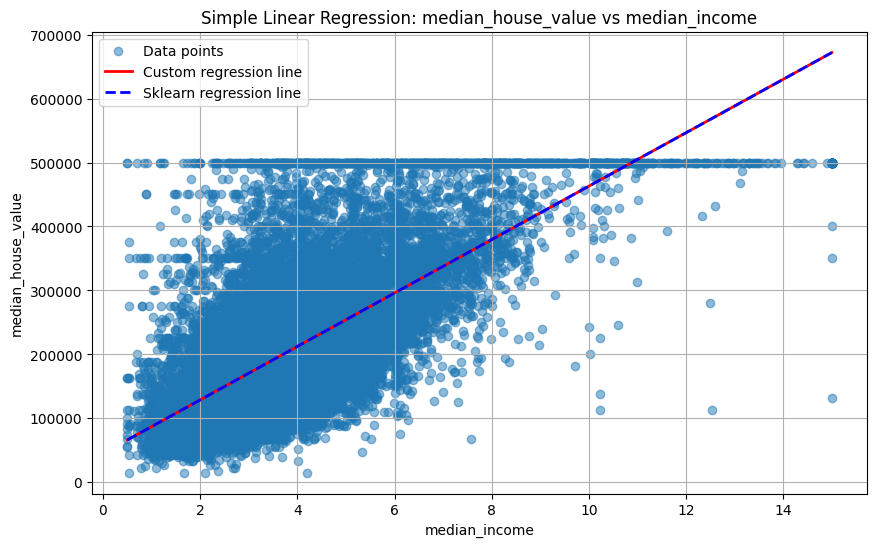

In [23]:
# Visualize the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(X, y, alpha=0.5, label='Data points')

# Set up the x values for the regression line
x_min = X.values.min()
x_max = X.values.max()
x_line = np.array([x_min, x_max])

# Custom implementation regression line
y_line_custom = slr.intercept_ + slr.coef_[0] * x_line
plt.plot(x_line, y_line_custom, color='red', linewidth=2, label='Custom regression line')

# Sklearn implementation regression line
y_line_sklearn = sklearn_slr.intercept_ + sklearn_slr.coef_[0] * x_line
plt.plot(x_line, y_line_sklearn, color='blue', linewidth=2, linestyle='--', label='Sklearn regression line')

# Add labels and title
plt.xlabel(feature_name)
plt.ylabel('median_house_value')
plt.title(f'Simple Linear Regression: median_house_value vs {feature_name}')
plt.legend()
plt.grid(True)
plt.show()